# Project : Credit Card Fraud Detection

Project Management Methodology : CRISP ML(Q)

    
Client : A financial institution or credit card company

Business Problem : Credit card companies need to effectively detect and prevent fraudulent credit card transactions to protect customers from unauthorized charges.
    
Business Objective/s : Develop a robust fraud detection system that accurately identifies fraudulent credit card transactions, especially in the face of highly imbalanced data, to minimize financial losses for both the company and its customers.

Business Constraints : Solution should be cost-effective and efficient, ensuring that the implementation of the fraud detection model does not excessively burden the company's resources or hinder its expansion plans.


Importing the dependencies

In [17]:
import numpy as np  # Linear alebra
import pandas as pd  # Data Processing
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data into an object

In [2]:
credit_card = pd.read_csv(r'creditcard.csv')

In [4]:
# Displaying all columns while calling

pd.options.display.max_columns = None

In [5]:
# Displaying the random 10 observation of the dataset.

credit_card.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192948,129925.0,-0.640476,1.326092,-1.961083,-1.123421,-0.633779,0.020499,0.545492,-2.304347,-0.084505,-0.082639,0.038974,0.062282,-1.423731,1.221559,-0.722808,0.119944,-0.196504,0.248275,0.719027,-1.023693,2.572671,0.159608,0.540489,-0.427647,-1.985937,1.062886,0.228178,0.198970,181.26,0
192537,129745.0,-1.293309,2.196684,-1.208820,-1.048730,0.993575,-0.460608,1.084275,-0.190960,1.056442,1.714782,-1.195738,0.504306,1.675044,-0.458654,0.494674,-0.443978,-0.947015,0.141980,0.141862,0.946631,0.097269,1.181998,-0.157529,0.086392,-0.340220,-0.242572,0.688229,0.180385,0.89,0
109688,71493.0,-0.942359,1.192663,1.176223,0.785944,0.614356,1.075488,0.376972,0.427017,-0.105034,0.420125,-0.184110,-0.503105,-1.778639,0.366385,-0.081779,-0.644114,0.089525,0.377028,1.509860,0.209057,-0.152597,-0.187919,-0.462244,-1.173616,0.616520,-0.061736,0.305606,0.167775,2.49,0
127394,78315.0,1.125361,-0.051431,-1.491536,0.109132,2.342789,3.223098,-0.018266,0.706141,-0.402068,0.065783,-0.065306,0.110176,-0.067240,0.679010,0.936463,0.371763,-0.864080,-0.226846,0.196162,0.158005,-0.388327,-1.510296,0.031526,0.940205,0.523320,-0.719737,-0.012663,0.033084,95.40,0
127058,78194.0,1.270454,-0.115383,0.336921,0.073703,-0.419189,-0.442449,-0.089837,-0.188680,0.591337,-0.410170,-0.896233,1.098016,1.502267,-0.549280,-0.426217,-0.288718,-0.073619,-0.732446,0.632876,0.049782,-0.122643,-0.061658,-0.150743,0.027349,0.554234,1.136483,-0.060539,0.000398,20.00,0
206495,136232.0,2.264868,-1.471890,-0.980078,-1.608067,-1.154044,-0.370536,-1.188322,-0.140896,-1.086817,1.542755,-1.310625,-0.911588,0.508193,-0.523355,-0.056597,-0.382532,0.337258,0.090697,-0.067986,-0.347390,-0.168498,-0.049393,0.229099,0.453277,-0.202973,-0.197837,0.010847,-0.037879,42.00,0
273030,165387.0,1.855672,0.620699,-2.592290,1.722436,0.724881,-1.394852,0.362404,-0.151360,0.035029,-0.970378,1.867912,-0.524019,-1.665238,-2.662418,0.396753,1.319931,2.117169,2.153214,-0.979102,-0.155894,0.132671,0.353208,-0.084284,-0.322669,0.201035,-0.444664,0.028249,0.023862,50.29,0
255701,157355.0,0.022703,0.528472,-1.194576,-1.725949,2.914869,3.411539,0.358855,0.923374,-0.168130,-0.392480,-0.199636,0.030478,-0.373511,0.354654,0.041631,-0.153448,-0.482955,-0.840007,-0.207917,0.036229,-0.262467,-0.716757,0.123076,0.687776,-0.457673,0.161742,0.263213,0.090695,7.98,0
123319,76882.0,-1.754805,-0.802251,1.771228,1.529906,1.841720,-0.293772,-0.414344,0.370365,-0.718062,-0.147031,0.829313,0.881131,0.035878,0.255185,-0.318136,-0.965577,0.330486,-0.031942,1.242587,0.576271,0.145793,0.065710,0.021427,-0.284802,0.556901,-0.130380,0.031607,0.094955,47.58,0
224828,143979.0,1.460520,-1.318757,0.076848,0.676911,-1.384318,-0.110706,-0.729476,0.034545,1.663378,-0.324280,-0.863462,0.750527,0.840702,-0.465761,1.065842,0.531130,-0.743909,0.478822,-0.606312,0.328152,0.401319,0.856349,-0.026830,-0.045067,-0.438057,-0.290342,0.033617,0.020524,255.46,0


In [8]:
# First 5 observations

credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Last 5 observations

credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
# Dimension of the dataset

credit_card.shape

(284807, 31)

In [12]:
print('The number of rows :',credit_card.shape[0])
print('The number of cols :',credit_card.shape[1])

The number of rows : 284807
The number of cols : 31


More information about the dataset

In [13]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Statistical details of the dataset

In [15]:
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Checking the Null values

In [16]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

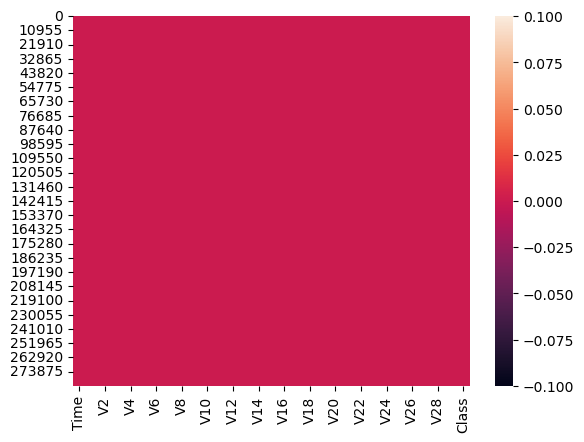

In [18]:
sns.heatmap(credit_card.isnull())

Feature Scaling

In [19]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Here except 'TIme' and 'Amount' attributes, all attributes are in a range between o to 1.
Here there is no use of this 'Time' feature , so we will drop it and then we will apply scaling on this attribute only.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [27]:
credit_card['Amount'] = sc.fit_transform(pd.DataFrame(credit_card['Amount']))

In [28]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


Dropping the 'Time' feature

In [29]:
credit_card = credit_card.drop(['Time'], axis = 1)

In [30]:
credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [31]:
credit_card.shape

(284807, 30)

Checking the duplicates

In [34]:
credit_card.duplicated().any()

True

In [35]:
credit_card.duplicated().sum()

9144

In [37]:
# Dopping the duplicates from the dataset

credit_card = credit_card.drop_duplicates()

In [39]:
# Dimension of the dataset - After removing the duplicates
credit_card.shape

(275663, 30)

Checking whether data is balanced or not

In [40]:
credit_card['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

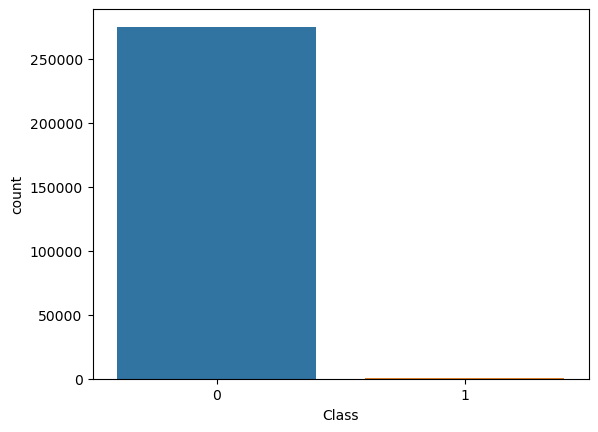

In [47]:
# Visualization

sns.countplot( x = credit_card['Class'])

Uneven distribution i.e high number of non-frauds and less number of fraud events happened in this dataset. So we can say that this dataset is fully unbalanced.

Separating the independent and dependent features

Storing the independent feature matrix into X and target ( response ) into Y

In [48]:
X = credit_card.drop(['Class'], axis = 1)
Y = credit_card['Class']

In [49]:
X.shape

(275663, 29)

In [50]:
Y.shape

(275663,)

Splitting the dataset into train and test set

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

BEFORE SAMPLING

a) Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
log_re = LogisticRegression()
log_re.fit(X_train, Y_train)

LogisticRegression()

In [56]:
y_predlog = log_re.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(Y_test, y_predlog)

0.9990568262202311

In [58]:
from sklearn.metrics import precision_score , recall_score, f1_score

In [60]:
precision_score(Y_test, y_predlog)

0.8472222222222222

In [61]:
recall_score(Y_test, y_predlog)

0.5980392156862745

In [62]:
f1_score(Y_test, y_predlog)

0.7011494252873564

Here, the accuracy of logistic regression is around 99.9% but the score of precision , recall and f1_score is very low if we compare it with logistic regression.

It is due to the imabalancing of the dataset.

Handling The Imbalancing Dataset

a) Undersampling 

b) Oversampling

### Undersampling

In [65]:
non_fraud = credit_card[credit_card['Class'] == 0]
fraud = credit_card[credit_card['Class'] == 1]

In [66]:
non_fraud.shape

(275190, 30)

In [68]:
fraud.shape

(473, 30)

In [69]:
new_non_fraud = non_fraud.sample(n = 473)

In [70]:
new_non_fraud.shape

(473, 30)

In [76]:
sample_data = pd.concat([new_non_fraud, fraud], ignore_index = True)

In [77]:
sample_data.Class.value_counts()

0    473
1    473
Name: Class, dtype: int64

In [78]:
sample_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.957238,0.193936,-1.608591,1.410799,0.490118,-1.109519,0.770611,-0.493535,0.026447,0.207529,-0.779216,0.926250,0.872413,0.317619,-0.637839,-0.787459,-0.190026,-0.791452,-0.243230,-0.153322,0.085588,0.447010,-0.048343,0.025163,0.482528,-0.497244,-0.014343,-0.053085,-0.169317,0
1,-1.332397,0.561583,1.092076,2.545185,-0.132232,0.447642,2.196278,-0.049964,-1.952216,-0.567788,0.098681,-0.484667,0.183430,-0.776146,0.988686,0.417020,0.869232,-0.391232,-0.454734,0.910079,-0.232044,-1.470107,0.904825,-0.138961,0.058768,-0.337377,-0.065002,0.135320,1.176318,0
2,1.705085,-1.519090,-1.003111,-0.208453,-0.683211,0.502904,-0.628297,0.115917,-0.212169,0.855242,-0.101489,0.561772,0.113642,-0.022371,-0.902562,-1.004503,-0.505457,1.374305,-0.122543,-0.154410,-0.652296,-1.802256,0.311924,0.013950,-0.687694,-0.184697,-0.045525,-0.010566,0.523311,0
3,-1.643546,3.179042,-2.954472,-0.308829,1.159928,-0.312636,-0.924232,-7.471447,0.066493,-0.950667,0.180987,0.361084,-0.121990,-2.367206,-0.718414,0.257340,2.738547,0.535115,-0.981506,-1.566050,6.956590,-1.960369,0.964109,0.784904,-0.189376,0.546710,0.298357,0.137503,-0.350191,0
4,-1.443205,0.193201,1.594627,-0.260035,1.107111,-1.663924,0.237176,-0.112919,-0.337688,-0.795135,-0.353880,-0.135270,-0.145766,-0.405104,0.484939,0.689157,-0.279418,-0.207958,-0.802069,-0.231660,-0.229471,-0.776758,-0.198815,0.343613,-0.093401,-0.067845,-0.012639,0.097614,-0.345313,0


In [79]:
X = sample_data.drop(['Class'], axis = 1)
Y = sample_data['Class']

In [80]:
# Splitting the data into train and test set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

AFTER UNDERSAMPLING

a) Logistic Regression

In [81]:
log_re = LogisticRegression()
log_re.fit(X_train, Y_train)

LogisticRegression()

In [82]:
y_predlog = log_re.predict(X_test)

In [83]:
accuracy_score(Y_test, y_predlog)

0.9368421052631579

In [84]:
precision_score(Y_test, y_predlog)

0.9787234042553191

In [85]:
recall_score(Y_test, y_predlog)

0.9019607843137255

In [86]:
f1_score(Y_test, y_predlog)

0.9387755102040817

b) Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [90]:
y_preddt = dt.predict(X_test)

In [91]:
accuracy_score(Y_test, y_preddt)

0.8947368421052632

In [92]:
precision_score(Y_test, y_preddt)

0.9361702127659575

In [94]:
recall_score(Y_test, y_preddt)

0.8627450980392157

In [93]:
f1_score(Y_test, y_preddt)

0.8979591836734694

c) Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [97]:
y_predrf = rf.predict(X_test)

In [98]:
accuracy_score(Y_test, y_predrf)

0.9315789473684211

In [99]:
precision_score(Y_test, y_predrf)

0.989010989010989

In [100]:
recall_score(Y_test, y_predrf)

0.8823529411764706

In [102]:
f1_score(Y_test, y_predrf)

0.9326424870466321

In [104]:
acc_data = pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest'],
            'Accuracy':[accuracy_score(Y_test,y_predlog)*100,
                       accuracy_score(Y_test,y_preddt)*100,
                       accuracy_score(Y_test,y_predrf)*100
                       ]})

In [105]:
acc_data

,Models,Accuracy
0,Logistic Regression,93.684211
1,Decision Tree,89.473684
2,Random Forest,93.157895


<Axes: xlabel='Models', ylabel='Accuracy'>

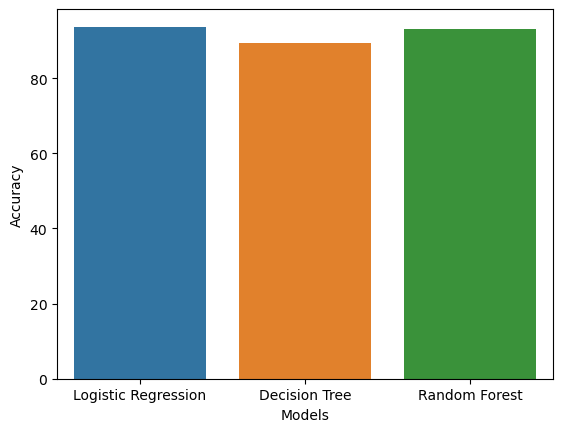

In [110]:
sns.barplot(x = acc_data['Models'],y = acc_data['Accuracy'])

One disadvantage of 'undersampling' is that here data is lost.

### Oversampling

In [113]:
X = credit_card.drop(['Class'], axis = 1)
Y = credit_card['Class']

In [114]:
X.shape

(275663, 29)

In [115]:
Y.shape

(275663,)

In [116]:
from imblearn.over_sampling import SMOTE

In [117]:
X_res, Y_res = SMOTE().fit_resample(X,Y)

In [118]:
X_res.shape

(550380, 29)

In [119]:
Y_res.shape

(550380,)

In [120]:
Y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.2, random_state = 2)

a) Logistic regression

In [122]:
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

In [123]:
y_predlog = log.predict(X_test)

In [124]:
accuracy_score(Y_test, y_predlog)

0.9446473345688433

In [126]:
precision_score(Y_test, y_predlog)

0.9722248918789044

In [127]:
recall_score(Y_test, y_predlog)

0.9158397914101543

In [128]:
f1_score(Y_test, y_predlog)

0.943190400268524

b) Decision Tree Classifier

In [130]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [131]:
y_preddt = dt.predict(X_test)

In [132]:
accuracy_score(Y_test, y_preddt)

0.9983284276318181

In [133]:
precision_score(Y_test, y_preddt)

0.9974694526787651

In [138]:
recall_score(Y_test, y_preddt)

0.9992033026725574

In [135]:
f1_score(Y_test, y_preddt)

0.9983356248643173

c) Random Forest Classifier

In [136]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [139]:
y_predrf = rf.predict(X_test)

In [144]:
accuracy_score(Y_test, y_predrf)

0.9999091536756423

In [145]:
precision_score(Y_test, y_predrf)

0.9998189652051124

In [146]:
recall_score(Y_test, y_predrf)

1.0

In [147]:
f1_score(Y_test, y_predrf)

0.9999094744084153

In [148]:
acc_data = pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest'],
            'Accuracy':[accuracy_score(Y_test,y_predlog)*100,
                       accuracy_score(Y_test,y_preddt)*100,
                       accuracy_score(Y_test,y_predrf)*100
                       ]})

In [149]:
acc_data

,Models,Accuracy
0,Logistic Regression,94.464733
1,Decision Tree,99.832843
2,Random Forest,99.990915


<Axes: xlabel='Models', ylabel='Accuracy'>

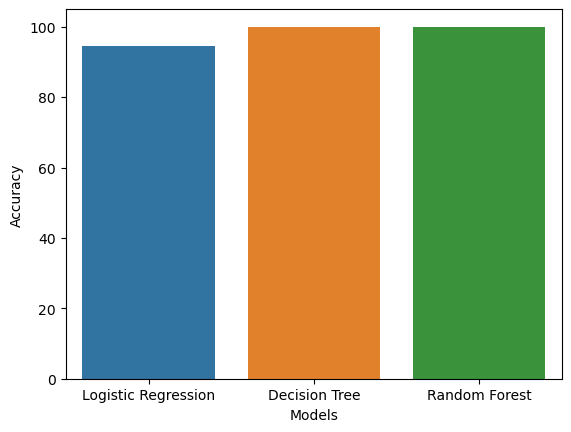

In [150]:
sns.barplot(x = acc_data['Models'],y = acc_data['Accuracy'])

## Save the model

In [151]:
# Train on entire dataset

rf1 = RandomForestClassifier()
rf1.fit(X_res,Y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf1,"credit_card_model")

In [ ]:
model = joblib.load("credit_card_model")